In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def tank_concentrations(steps=200):
    vol_x = 100 # Initial tank volume for tank x in L
    vol_y = 100 # Initial tank volume for tank y in L
    con_x, con_y = 0, 0.2 # Initial salt concentrations in KG/L
    con_inflow_x = 0.2 # Inflow salt concentration for tank x in KG/L
    inflow_x = 6 # Inflow for tank x in L/MIN
    outflow_x = 4 # Outflow for tank x in L/MIN
    inflow_y = 3 # Inflow for tank y in L/MIN
    outflow_y = 2 # Outflow for tank y in L/MIN
    backflow_y = 1 # Backflow for tank y to tank y in L/MIN

    cons_x, cons_y = [], [] # For storing concentrations over time
    cons_x.append(con_x) # Add initial concentration for tank x
    cons_y.append(con_y) # Add initial concentration for tank y

    for _ in range(steps):

        # Current salt concentrations in tank x and y
        tankcon_x = con_x * vol_x
        tankcon_y = con_y * vol_y

        # Change tank volumes according to in-, out- and backflow
        vol_x += inflow_x + backflow_y - outflow_x - inflow_y
        vol_y += inflow_y - outflow_y - backflow_y

        # Salt concentration going into tank x and y
        con_x_in = con_inflow_x * inflow_x + con_y * backflow_y
        con_y_in = con_x * inflow_y

        # Salt concentration going out of tank x and y
        con_x_out = con_x * outflow_x + con_x * inflow_y
        con_y_out = con_y * backflow_y + con_y * outflow_y

        # New salt concentrations in tank x and y
        con_x = (tankcon_x + con_x_in - con_x_out) / vol_x
        con_y = (tankcon_y + con_y_in - con_y_out) / vol_y
        
        # Add new tank concentration for tank x and y
        cons_x.append(con_x)
        cons_y.append(con_y)

    return cons_x, cons_y

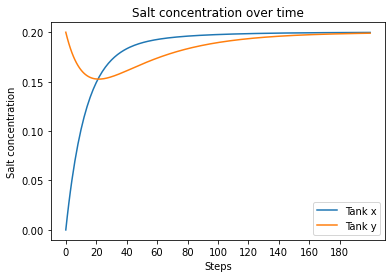

In [9]:
x, y = tank_concentrations()

plt.title("Salt concentration over time")
plt.plot(range(len(x)), x, label="Tank x")
plt.plot(range(len(y)), y, label="Tank y")
plt.xticks(np.arange(0, 200, step=20))
plt.yticks(np.arange(0, 0.21, step=.05))
plt.xlabel("Steps")
plt.ylabel("Salt concentration")
plt.legend()
plt.show()